In [1]:
# Parameters 

provider = 'CDS'
GCM = 'ECMWF'

In [2]:
%matplotlib inline

In [3]:
import os
import sys 
import pathlib

In [4]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

In [5]:
HOME = pathlib.Path.home()

In [6]:
sys.path.append('../../../../utils/')

In [7]:
from set_root_dir import set_root_dir
from get_GCM_outputs import get_GCM_outputs
from shift_dset_time import shift_dset_time 

In [8]:
from matplotlib import pyplot as plt

In [9]:
import proplot as plot

In [10]:
import numpy as np
import pandas as pd

In [11]:
import xarray as xr

In [12]:
xr.__version__

'0.15.1'

In [13]:
rpath = set_root_dir(root='gdata')

In [14]:
dset_t2m_ecmwf_hindcasts, coords_hindcasts = get_GCM_outputs(provider=provider, \
                                                             GCM=GCM, var_name='T2M', period='hindcasts', \
                                                             rpath=rpath, domain=[90, 300, -65, 50], step=3, flatten=True, ensmean=True)

first file is /media/nicolasf/GDATA/END19101/Working/data/GCMs/processed/hindcasts/CDS/ECMWF/T2M/ECMWF_T2M_seasonal_anomalies_interp_1993_01.nc
last file is /media/nicolasf/GDATA/END19101/Working/data/GCMs/processed/hindcasts/CDS/ECMWF/T2M/ECMWF_T2M_seasonal_anomalies_interp_2016_12.nc


In [15]:
dset_t2m_ecmwf_hindcasts

<xarray.Dataset>
Dimensions:     (time: 288, z: 3995)
Coordinates:
    step        int64 3
    valid_time  datetime64[ns] ...
  * time        (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2016-12-01
  * z           (z) MultiIndex
  - lat         (z) float64 -65.0 -65.0 -65.0 -65.0 ... 50.0 50.0 50.0 50.0
  - lon         (z) float64 90.0 92.5 95.0 97.5 ... 292.5 295.0 297.5 300.0
Data variables:
    t2m         (time, z) float64 0.1049 0.1762 0.003983 ... 0.6318 0.5806

In [16]:
coords_hindcasts.dims

Frozen(SortedKeysDict({'lon': 85, 'lat': 47, 'time': 288}))

### get the dimensions IN ORDER for the variable of interest in a tuple

In [17]:
dset_precip_ecmwf_hindcasts, coords_hindcasts = get_GCM_outputs(provider=provider, \
                                                                GCM=GCM, var_name='PRECIP', period='hindcasts', \
                                                                rpath=rpath, domain=[90, 300, -65, 50], step=3, flatten=True, ensmean=True)

first file is /media/nicolasf/GDATA/END19101/Working/data/GCMs/processed/hindcasts/CDS/ECMWF/PRECIP/ECMWF_PRECIP_seasonal_anomalies_interp_1993_01.nc
last file is /media/nicolasf/GDATA/END19101/Working/data/GCMs/processed/hindcasts/CDS/ECMWF/PRECIP/ECMWF_PRECIP_seasonal_anomalies_interp_2016_12.nc


In [18]:
dset_precip_ecmwf_hindcasts

<xarray.Dataset>
Dimensions:     (time: 288, z: 3995)
Coordinates:
    step        int64 3
    valid_time  datetime64[ns] ...
  * time        (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2016-12-01
  * z           (z) MultiIndex
  - lat         (z) float64 -65.0 -65.0 -65.0 -65.0 ... 50.0 50.0 50.0 50.0
  - lon         (z) float64 90.0 92.5 95.0 97.5 ... 292.5 295.0 297.5 300.0
Data variables:
    precip      (time, z) float64 -1.065e-09 -1.625e-09 ... 1.459e-09 6.516e-10

In [19]:
coords_hindcasts.dims

Frozen(SortedKeysDict({'lon': 85, 'lat': 47, 'time': 288}))

In [20]:
if 'valid_time' in dset_precip_ecmwf_hindcasts.coords: 
    dset_precip_ecmwf_hindcasts = dset_precip_ecmwf_hindcasts.drop('valid_time')

In [21]:
if 'valid_time' in dset_t2m_ecmwf_hindcasts.coords: 
    dset_t2m_ecmwf_hindcasts = dset_t2m_ecmwf_hindcasts.drop('valid_time')

### Now get the forecasts datasets (test period)

In [22]:
dset_t2m_ecmwf_forecasts, coords_forecasts = get_GCM_outputs(provider=provider, \
                                                             GCM=GCM, var_name='T2M', period='forecasts', rpath=rpath, \
                                                             domain=[90, 300, -65, 50], step=3, \
                                                             flatten=True, ensmean=True)

first file is /media/nicolasf/GDATA/END19101/Working/data/GCMs/processed/forecasts/CDS/ECMWF/T2M/ECMWF_T2M_seasonal_anomalies_interp_2017_01.nc
last file is /media/nicolasf/GDATA/END19101/Working/data/GCMs/processed/forecasts/CDS/ECMWF/T2M/ECMWF_T2M_seasonal_anomalies_interp_2019_12.nc


In [23]:
coords_forecasts.dims

Frozen(SortedKeysDict({'lon': 85, 'lat': 47, 'time': 36}))

In [24]:
dset_t2m_ecmwf_forecasts

<xarray.Dataset>
Dimensions:  (time: 36, z: 3995)
Coordinates:
    step     int64 3
  * time     (time) datetime64[ns] 2017-01-01 2017-02-01 ... 2019-12-01
  * z        (z) MultiIndex
  - lat      (z) float64 -65.0 -65.0 -65.0 -65.0 -65.0 ... 50.0 50.0 50.0 50.0
  - lon      (z) float64 90.0 92.5 95.0 97.5 100.0 ... 292.5 295.0 297.5 300.0
Data variables:
    t2m      (time, z) float64 0.2043 0.1123 -0.2904 ... 0.01545 -0.2032

In [25]:
dset_precip_ecmwf_forecasts, coords_forecasts = get_GCM_outputs(provider=provider, \
                                                                GCM=GCM, var_name='PRECIP', period='forecasts', rpath=rpath, \
                                                                domain=[90, 300, -65, 50], step=3, flatten=True, ensmean=True)

first file is /media/nicolasf/GDATA/END19101/Working/data/GCMs/processed/forecasts/CDS/ECMWF/PRECIP/ECMWF_PRECIP_seasonal_anomalies_interp_2017_01.nc
last file is /media/nicolasf/GDATA/END19101/Working/data/GCMs/processed/forecasts/CDS/ECMWF/PRECIP/ECMWF_PRECIP_seasonal_anomalies_interp_2019_12.nc


In [26]:
dset_precip_ecmwf_forecasts

<xarray.Dataset>
Dimensions:  (time: 36, z: 3995)
Coordinates:
    step     int64 3
  * time     (time) datetime64[ns] 2017-01-01 2017-02-01 ... 2019-12-01
  * z        (z) MultiIndex
  - lat      (z) float64 -65.0 -65.0 -65.0 -65.0 -65.0 ... 50.0 50.0 50.0 50.0
  - lon      (z) float64 90.0 92.5 95.0 97.5 100.0 ... 292.5 295.0 297.5 300.0
Data variables:
    precip   (time, z) float64 -5.661e-11 -1.782e-10 ... -2.246e-09 -3.568e-09

### now shifts the time index so that the time corresponds to the time of the forecast, not the initialisation time 

### also shifts to the end of the month, to correspond to the convention used in the target time-series 

In [27]:
step = 3

In [28]:
dset_t2m_ecmwf_hindcasts = shift_dset_time(dset_t2m_ecmwf_hindcasts)

In [29]:
dset_precip_ecmwf_hindcasts = shift_dset_time(dset_precip_ecmwf_hindcasts)

In [30]:
dset_t2m_ecmwf_forecasts = shift_dset_time(dset_t2m_ecmwf_forecasts)

In [31]:
dset_precip_ecmwf_forecasts = shift_dset_time(dset_precip_ecmwf_forecasts)

In [32]:
dset_precip_ecmwf_forecasts

<xarray.Dataset>
Dimensions:  (time: 36, z: 3995)
Coordinates:
    step     int64 3
  * time     (time) datetime64[ns] 2017-04-30 2017-05-31 ... 2020-03-31
  * z        (z) MultiIndex
  - lat      (z) float64 -65.0 -65.0 -65.0 -65.0 -65.0 ... 50.0 50.0 50.0 50.0
  - lon      (z) float64 90.0 92.5 95.0 97.5 100.0 ... 292.5 295.0 297.5 300.0
Data variables:
    precip   (time, z) float64 -5.661e-11 -1.782e-10 ... -2.246e-09 -3.568e-09

In [33]:
dset_precip_ecmwf_forecasts

<xarray.Dataset>
Dimensions:  (time: 36, z: 3995)
Coordinates:
    step     int64 3
  * time     (time) datetime64[ns] 2017-04-30 2017-05-31 ... 2020-03-31
  * z        (z) MultiIndex
  - lat      (z) float64 -65.0 -65.0 -65.0 -65.0 -65.0 ... 50.0 50.0 50.0 50.0
  - lon      (z) float64 90.0 92.5 95.0 97.5 100.0 ... 292.5 295.0 297.5 300.0
Data variables:
    precip   (time, z) float64 -5.661e-11 -1.782e-10 ... -2.246e-09 -3.568e-09

In [34]:
dset_t2m = xr.concat([dset_t2m_ecmwf_hindcasts, dset_t2m_ecmwf_forecasts], dim='time')

In [35]:
dset_precip = xr.concat([dset_precip_ecmwf_hindcasts, dset_precip_ecmwf_forecasts], dim='time')

In [36]:
X = dset_t2m['t2m']

In [37]:
# X = dset_precip['precip']

In [38]:
time = X.time.to_index()

In [39]:
X_data = X.data

In [40]:
X_data.shape

(324, 3995)

In [41]:
X_df = pd.DataFrame(X_data, index=time)

In [42]:
X_df

,0,1,2,3,4,5,6,7,8,9,...,3985,3986,3987,3988,3989,3990,3991,3992,3993,3994
time,,,,,,,,,,,,,,,,,,,,,
1993-04-30,0.104904,0.176188,0.003983,-0.258628,-0.380725,-0.416544,-0.236770,-0.050384,0.047283,0.070338,...,-0.864625,-0.861614,-0.819140,-0.769956,-0.766006,-0.760540,-0.747155,-0.630586,-0.749156,-0.969845
1993-05-31,0.296425,0.352735,0.085273,-0.187171,-0.288131,-0.273714,-0.015459,0.324265,0.341323,0.375038,...,-0.467805,-0.464814,-0.457526,-0.453158,-0.396818,-0.380876,-0.367281,-0.433148,-0.373899,-0.676584
1993-06-30,-0.006445,0.161534,0.055442,0.028961,0.068204,0.125794,0.313595,0.607362,0.720145,0.726299,...,-0.897543,-0.943162,-0.976824,-0.960717,-0.937779,-0.865079,-0.817661,-0.741128,-0.824112,-1.325585
1993-07-31,-0.326852,-0.296365,-0.332528,-0.361938,-0.433313,-0.400285,-0.340890,-0.113637,0.064995,0.077836,...,-0.682955,-0.700439,-0.600338,-0.515830,-0.556718,-0.582272,-0.563884,-0.646257,-0.665005,-1.004136
1993-08-31,0.455479,0.503849,0.538331,0.536914,0.579548,0.541192,0.612661,0.740587,0.733461,0.646303,...,-0.811840,-0.834109,-0.762850,-0.676893,-0.674586,-0.690679,-0.739978,-0.690477,-0.867860,-1.180453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-30,0.210933,0.295718,0.406168,0.386706,0.501200,0.513379,0.548448,0.531270,0.507983,0.521302,...,0.339889,0.305024,0.343109,0.272847,0.270044,0.258088,0.261839,0.194630,0.227543,0.327937
2019-12-31,0.033188,0.095548,0.178470,0.108059,0.093378,0.106850,0.093414,0.087330,0.077367,0.083428,...,1.348291,1.271084,1.240580,1.123667,1.138107,1.108988,1.023416,0.759377,0.883280,0.993853
2020-01-31,-0.174839,-0.116303,-0.057346,-0.038480,-0.033943,-0.052710,-0.085817,-0.158022,-0.173884,-0.128167,...,1.463364,1.443479,1.444998,1.460079,1.419208,1.344592,1.209959,0.925137,0.889003,0.792083


### TARGETS 

In [43]:
dpath_target = HOME / 'research' / 'Smart_Ideas' / 'outputs' / 'targets' / 'NZ_regions' / 'NZ_6_regions'

#### RAINFALL 

In [44]:
target_var = 'TMEAN'

In [45]:
targets = []
for region_name in ['NNI','WNI','ENI','NSI','WSI','ESI']: 
    target = pd.read_csv(dpath_target / target_var / region_name / f'TS_NZ_region_{region_name}_{target_var}_3_quantiles_anoms.csv', index_col=0, parse_dates=True)
    target.columns = pd.MultiIndex.from_product([[region_name],target.columns])
    targets.append(target)

In [46]:
targets = pd.concat(targets, axis=1)

In [47]:
targets.head()

NNI                        WNI                        ENI  \
              Tmean_N cat_3 anomalies    Tmean_N cat_3 anomalies    Tmean_N   
time                                                                          
1979-03-31  18.278555     3  0.462528  16.051472     3  0.317965  16.732249   
1979-04-30  16.794408     2  0.227319  14.586906     3  0.248038  14.953599   
1979-05-31  14.695903     2  0.282907  12.522320     3  0.425773  12.716266   
1979-06-30  12.093823     2 -0.001099   9.888909     2  0.117671   9.929897   
1979-07-31  10.290536     2 -0.061355   8.182231     2  0.120974   8.208954   

                                  NSI                        WSI        \
           cat_3 anomalies    Tmean_N cat_3 anomalies    Tmean_N cat_3   
time                                                                     
1979-03-31     3  0.621540  13.811438     2 -0.093327  11.848419     1   
1979-04-30     3  0.299057  12.189450     1 -0.249176  10.589580     2   
1979-05-31     2  0.314655   9.888897     1 -0.215657   8.099501     1   
1979-06-30     1 -0.065854   7.198980     1 -0.300772   5.457298     1   
1979-07-31     2 -0.063564   5.534868     2 -0.058724   3.763353     2   

                            ESI                  
           anomalies    Tmean_N cat_3 anomalies  
time                                             
1979-03-31 -0.400334  13.728706     2 -0.222255  
1979-04-30 -0.110858  12.033578     2 -0.208919  
1979-05-31 -0.202497   9.232035     1 -0.470303  
1979-06-30 -0.197458   6.634168     1 -0.254247  
1979-07-31  0.085515   4.916423     2  0.112719

In [48]:
targets_anomalies = targets.loc[:, (slice(None), ["anomalies"])]

In [49]:
target_terciles = targets.loc[:, (slice(None), ["cat_3"])]

In [50]:
targets_anomalies.columns = targets_anomalies.columns.droplevel(1)

In [51]:
targets_anomalies.corr()

,NNI,WNI,ENI,NSI,WSI,ESI
NNI,1.000000,0.970509,0.929788,0.891544,0.787952,0.807058
WNI,0.970509,1.000000,0.935192,0.922933,0.843518,0.856946
ENI,0.929788,0.935192,1.000000,0.854135,0.727656,0.822796
NSI,0.891544,0.922933,0.854135,1.000000,0.922623,0.901411
WSI,0.787952,0.843518,0.727656,0.922623,1.000000,0.906402
ESI,0.807058,0.856946,0.822796,0.901411,0.906402,1.000000


In [52]:
target_terciles.columns = target_terciles.columns.droplevel(1)

In [53]:
target_terciles.corr()

,NNI,WNI,ENI,NSI,WSI,ESI
NNI,1.000000,0.892095,0.829419,0.810607,0.682188,0.719554
WNI,0.892095,1.000000,0.841664,0.809888,0.701791,0.757966
ENI,0.829419,0.841664,1.000000,0.760275,0.634579,0.723682
NSI,0.810607,0.809888,0.760275,1.000000,0.811111,0.803168
WSI,0.682188,0.701791,0.634579,0.811111,1.000000,0.814691
ESI,0.719554,0.757966,0.723682,0.803168,0.814691,1.000000


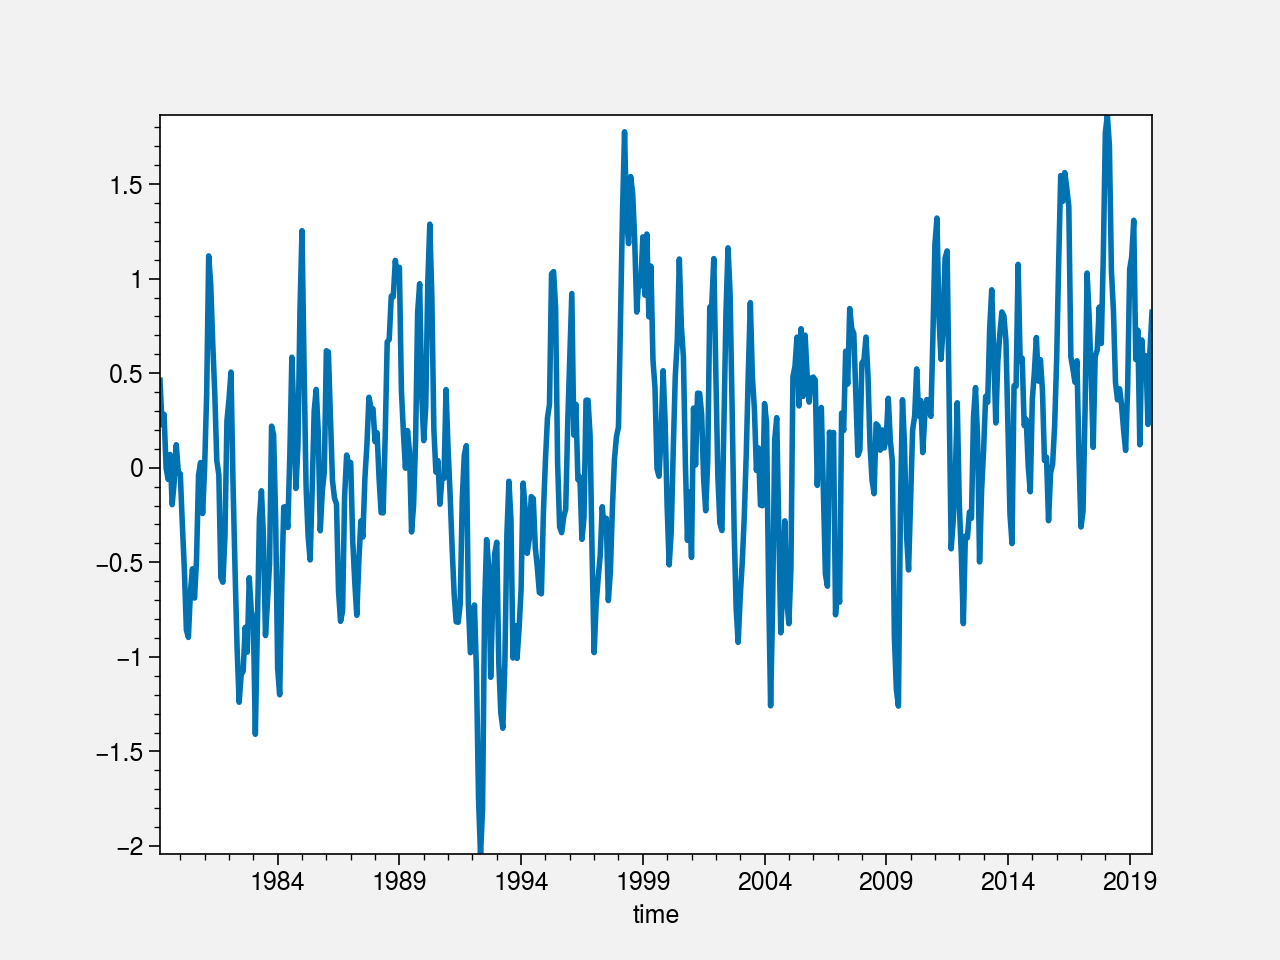

In [54]:
f, ax = plt.subplots()
targets_anomalies.NNI.plot(ax=ax, lw=2)
ax.grid(ls=':', color='w')

In [55]:
region_name = 'NNI'

In [56]:
y = target_terciles.loc[:,'NNI']

In [57]:
X_df.loc[:,'y'] = y

In [58]:
X_df = X_df.dropna(axis=0)

In [59]:
X_df

,0,1,2,3,4,5,6,7,8,9,...,3986,3987,3988,3989,3990,3991,3992,3993,3994,y
time,,,,,,,,,,,,,,,,,,,,,
1993-04-30,0.104904,0.176188,0.003983,-0.258628,-0.380725,-0.416544,-0.236770,-0.050384,0.047283,0.070338,...,-0.861614,-0.819140,-0.769956,-0.766006,-0.760540,-0.747155,-0.630586,-0.749156,-0.969845,1.0
1993-05-31,0.296425,0.352735,0.085273,-0.187171,-0.288131,-0.273714,-0.015459,0.324265,0.341323,0.375038,...,-0.464814,-0.457526,-0.453158,-0.396818,-0.380876,-0.367281,-0.433148,-0.373899,-0.676584,1.0
1993-06-30,-0.006445,0.161534,0.055442,0.028961,0.068204,0.125794,0.313595,0.607362,0.720145,0.726299,...,-0.943162,-0.976824,-0.960717,-0.937779,-0.865079,-0.817661,-0.741128,-0.824112,-1.325585,1.0
1993-07-31,-0.326852,-0.296365,-0.332528,-0.361938,-0.433313,-0.400285,-0.340890,-0.113637,0.064995,0.077836,...,-0.700439,-0.600338,-0.515830,-0.556718,-0.582272,-0.563884,-0.646257,-0.665005,-1.004136,2.0
1993-08-31,0.455479,0.503849,0.538331,0.536914,0.579548,0.541192,0.612661,0.740587,0.733461,0.646303,...,-0.834109,-0.762850,-0.676893,-0.674586,-0.690679,-0.739978,-0.690477,-0.867860,-1.180453,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,0.257864,0.342864,0.424536,0.424035,0.526794,0.617767,0.754474,0.903547,0.952299,0.932574,...,-0.206670,-0.088370,-0.002012,0.038403,-0.003018,-0.176454,-0.176866,0.028099,-0.116442,3.0
2019-09-30,-0.188926,-0.014767,0.174841,0.067615,0.129481,0.252453,0.240107,0.168091,0.105398,0.160736,...,-0.439609,-0.438881,-0.342081,-0.231929,-0.164512,-0.151025,-0.201324,-0.005754,0.139025,3.0
2019-10-31,0.679581,0.822940,0.982098,0.938808,1.116482,1.069211,1.102964,1.036058,0.972908,0.960210,...,0.206532,0.167031,0.112493,0.105971,0.117802,0.094995,0.016731,0.041394,0.079325,3.0


In [60]:
import autogluon as ag
from autogluon import TabularPrediction as task

/home/nicolasf/anaconda3/envs/ML/lib/python3.7/site-packages/mxnet/optimizer/optimizer.py:167: UserWarning: WARNING: New optimizer gluonnlp.optimizer.lamb.LAMB is overriding existing optimizer mxnet.optimizer.optimizer.LAMB
  Optimizer.opt_registry[name].__name__))


In [61]:
train_data = X_df.iloc[:200,:]

In [62]:
test_data = X_df.iloc[200:,:]

In [63]:
train_data.shape[0] + test_data.shape[0]

321

In [64]:
train_data = task.Dataset(train_data)

In [65]:
train_data.columns

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       3986, 3987, 3988, 3989, 3990, 3991, 3992, 3993, 3994,  'y'],
      dtype='object', length=3996)

In [66]:
opath = pathlib.Path('./auto_exp')

In [67]:
if not opath.exists(): 
    opath.mkdir(parents=True)

In [68]:
predictor = task.fit(train_data=train_data, label='y', output_directory=str(opath))

Beginning AutoGluon training ...
AutoGluon will save models to auto_exp/
Train Data Rows:    200
Train Data Columns: 3996
Preprocessing data ...
Here are the first 10 unique label values in your data:  [1. 2. 3.]
AutoGluon infers your prediction problem is: multiclass  (because dtype of label-column == float, but few unique label-values observed and label-values can be converted to int)
If this is wrong, please specify `problem_type` argument in fit() instead (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])

Feature Generator processed 200 data points with 3995 features
Original Features:
	float features: 3995
Generated Features:
	int features: 0
All Features:
	float features: 3995
	int features: 0
	Data preprocessing and feature engineering runtime = 5.2s ...
AutoGluon will gauge predictive performance using evaluation metric: accuracy
To change this, specify the eval_metric argument of fit()
AutoGluon will early stop models using evaluation metric: acc

In [69]:
test_data = task.Dataset(test_data)
y_test = test_data['y']  # values to predict
test_data_nolab = test_data.drop(labels=['y'],axis=1) # delete label column to prove we're not cheating
print(test_data_nolab.head())

                0         1         2         3         4         5     \
time                                                                     
2009-12-31 -0.364508 -0.375110 -0.381626 -0.388707 -0.409474 -0.387914   
2010-01-31  0.170068  0.120031  0.118452  0.162762  0.151541  0.088050   
2010-02-28 -0.155525 -0.158343 -0.151891 -0.154257 -0.141331 -0.141883   
2010-03-31 -0.371810 -0.458109 -0.578383 -0.674395 -0.670287 -0.668574   
2010-04-30 -0.867291 -1.347538 -1.338989 -1.035598 -1.206797 -0.774270   

                6         7         8         9     ...      3985      3986  \
time                                                ...                       
2009-12-31 -0.416194 -0.495811 -0.532045 -0.513696  ...  0.386002  0.346614   
2010-01-31  0.098508  0.068634  0.062856  0.070356  ... -0.046257 -0.065220   
2010-02-28 -0.112070 -0.013217  0.039136  0.047348  ... -0.001318 -0.189035   
2010-03-31 -0.569835 -0.370874 -0.217719 -0.212754  ...  0.236715  0.235685   
2010-04

In [70]:
y_pred = predictor.predict(test_data_nolab)

In [71]:
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: accuracy on test data: 0.6446280991735537
Evaluations on test data:
{
    "accuracy": 0.6446280991735537,
    "accuracy_score": 0.6446280991735537,
    "balanced_accuracy_score": 0.37146307798481715,
    "matthews_corrcoef": 0.11492947723560203
}
Detailed (per-class) classification report:
{
    "1.0": {
        "precision": 0.5,
        "recall": 0.07142857142857142,
        "f1-score": 0.125,
        "support": 14
    },
    "2.0": {
        "precision": 0.2,
        "recall": 0.17391304347826086,
        "f1-score": 0.18604651162790697,
        "support": 23
    },
    "3.0": {
        "precision": 0.7373737373737373,
        "recall": 0.8690476190476191,
        "f1-score": 0.7978142076502732,
        "support": 84
    },
    "accuracy": 0.6446280991735537,
    "macro avg": {
        "precision": 0.47912457912457906,
        "recall": 0.37146307798481715,
        "f1-score": 0.36962023975939334,
        "support": 121
    },
    "weighted avg": {
        "precision": 0.

In [72]:
y_pred

array([1., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 2., 3., 2., 2., 3., 2., 3., 2., 2., 2., 2., 3., 3., 3.,
       2., 3., 1., 3., 3., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 2., 3., 3., 2., 3., 2., 2., 3., 3., 3., 2., 3., 3., 3., 3.,
       2., 3., 3., 3., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       2., 2.])

### ACC

In [79]:
(test_data.loc[:,'y'].values == y_pred).sum() / len(y_pred)

0.6446280991735537

In [80]:
y_pred

array([1., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 2., 3., 2., 2., 3., 2., 3., 2., 2., 2., 2., 3., 3., 3.,
       2., 3., 1., 3., 3., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 2., 3., 3., 2., 3., 2., 2., 3., 3., 3., 2., 3., 3., 3., 3.,
       2., 3., 3., 3., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       2., 2.])

In [81]:
test_data.loc[:,'y'].values

array([1., 2., 2., 3., 3., 2., 3., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 1., 1., 2., 3., 2., 1., 1., 1., 1., 1., 2., 3., 3.,
       2., 1., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 2., 1.,
       1., 3., 3., 3., 3., 3., 2., 3., 2., 2., 3., 3., 3., 3., 3., 3., 2.,
       2., 1., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 2.,
       1., 1., 3., 3., 3., 3., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 2., 3., 3., 3., 3., 3., 3., 2., 3., 3., 3., 3.,
       3., 3.])

In [82]:
from sklearn import metrics

In [83]:
metrics.confusion_matrix(test_data.loc[:,'y'].values,y_pred)

array([[ 1,  5,  8],
       [ 1,  4, 18],
       [ 0, 11, 73]])

In [85]:
d = predictor.leaderboard(silent=True)

In [86]:
d

,model,score_val,fit_time,pred_time_val,stack_level
10,weighted_ensemble_k0_l1,0.675,0.316021,0.000712,1
6,LightGBMClassifier,0.625,3.941322,0.712216,0
8,NeuralNetClassifier,0.600,4.541956,0.420195,0
9,LightGBMClassifierCustom,0.600,21.401541,0.706578,0
3,ExtraTreesClassifierEntr,0.550,1.191969,0.767772,0
0,RandomForestClassifierGini,0.525,1.225116,0.867831,0
5,KNeighborsClassifierDist,0.525,1.427513,1.466693,0
2,ExtraTreesClassifierGini,0.525,1.220157,0.802964,0
7,CatboostClassifier,0.525,44.426872,0.723099,0
1,RandomForestClassifierEntr,0.500,1.361700,0.793118,0


In [87]:
predictor.save()

TabularPredictor saved. To load, use: TabularPredictor.load("auto_exp/")
